## 다중회귀 분석
* 단일 회귀분석에 비해 변수가 2개이상 증가
* 기술통계학이나 추론통계학 상의 주요 기법
* 기술통계학이나 추론통계학 상의 주요 기법
* 종속변수y를 보다 더 잘 설명하고
  예측하기 위해 여러 독립변수x를 사용함
* 하지만, 독립변수가 3개 이상인 경우
  그래프로 표현하기 어려워지므로
  보통 y = ax1 + bx2 + cx3 + d 정도로만 고려하는 것이 좋음

# ex) 부동산 회사에서 소유하고 있는 주택에 대해
고객들의 많은 문의사항 중 하나는 난방비가 얼마나 드냐가 중요하다.
난방비 가이드라인 작성을 위해 음의로 선별한 20채의 주택에 대해
다중회귀분석을 실시하시오


In [1]:
library(corrplot)
library(MASS)

corrplot 0.90 loaded



In [2]:
houses <- read.csv('houses.txt', sep='\t')
head(houses) # 외우자. 불러오기

,난방비,평균외부기온,단열재,난방사용연수
,<int>,<int>,<int>,<int>
1,250,35,3,6
2,360,29,4,10
3,165,36,7,3
4,43,60,6,9
5,92,65,5,6
6,200,30,5,5


# 독립변수 : 평균외부기온, 단열재, 난방사용연수
# 종속변수 :  난방비

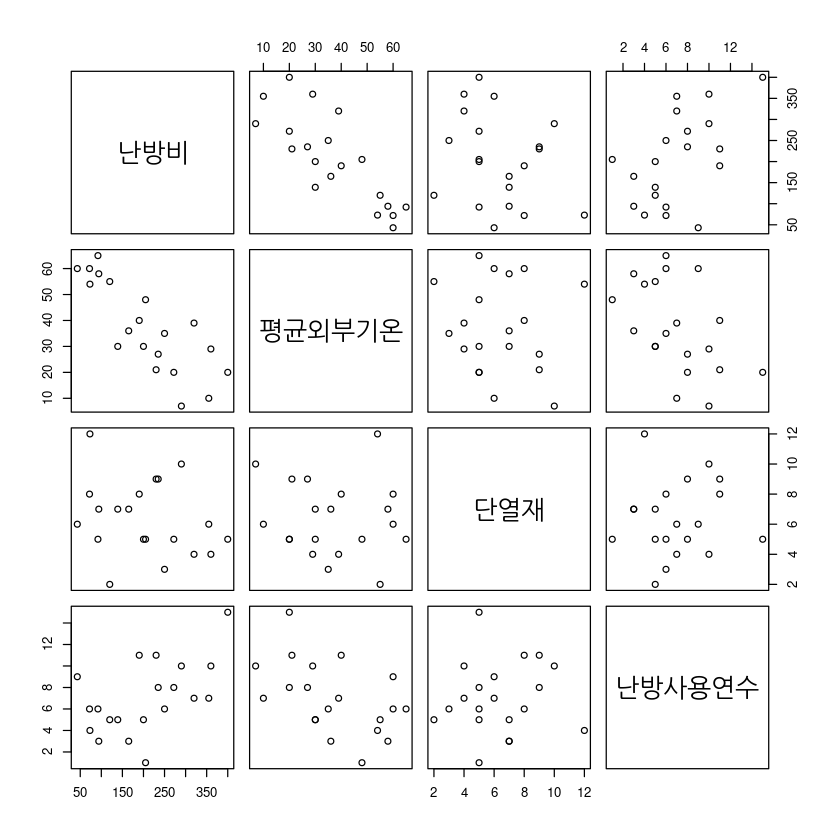

In [3]:
# 시각화
plot(houses)

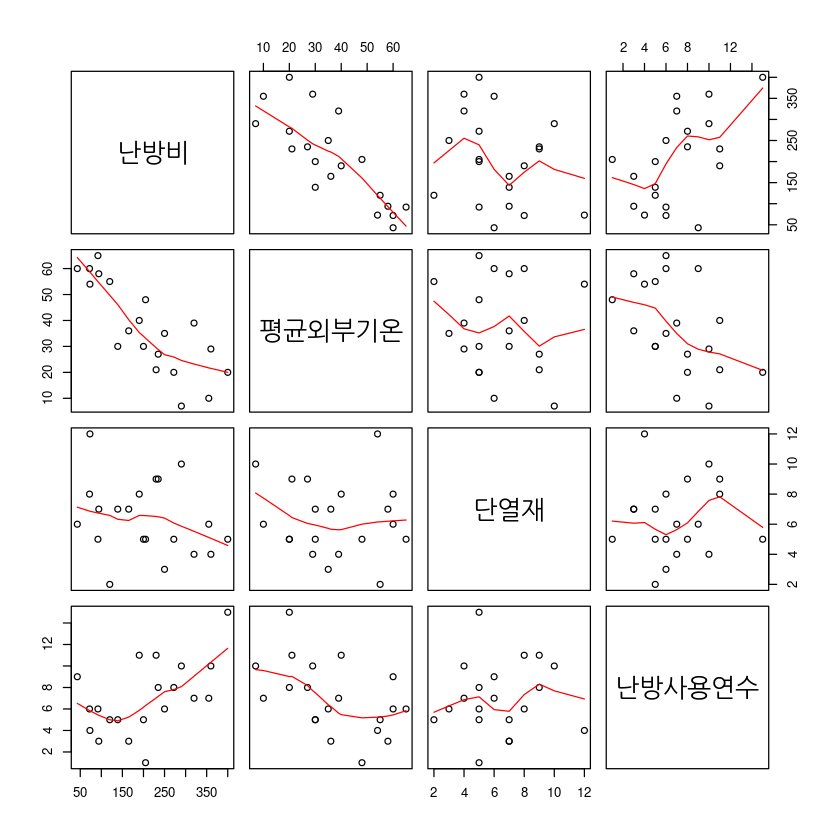

In [4]:
# 시각화 2
pairs(houses, panel=panel.smooth)

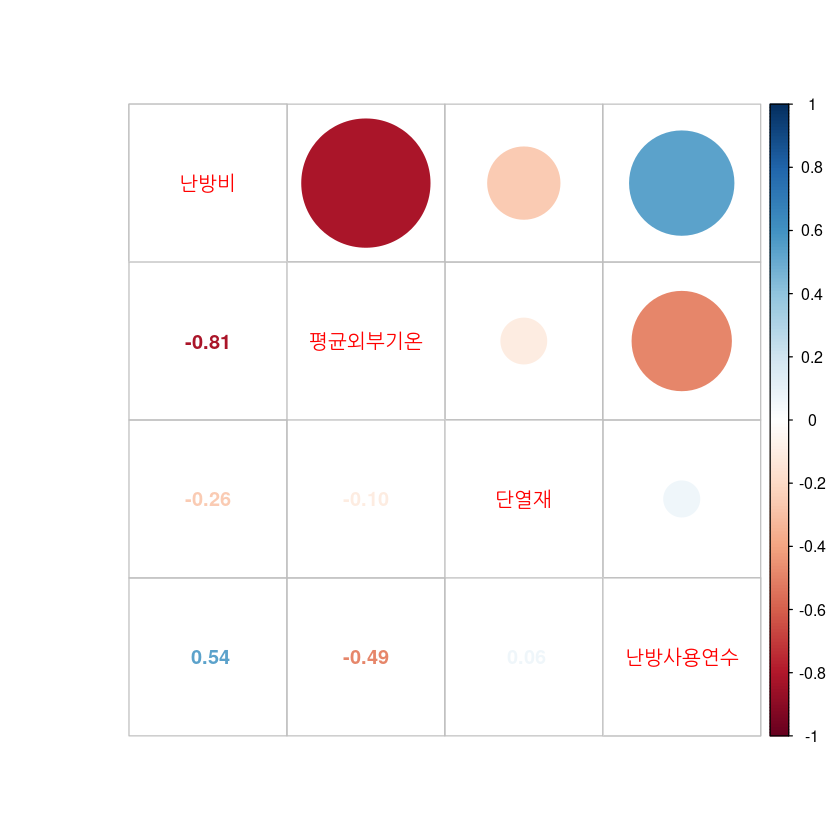

In [5]:
cor <-cor(houses)
corrplot.mixed(cor)

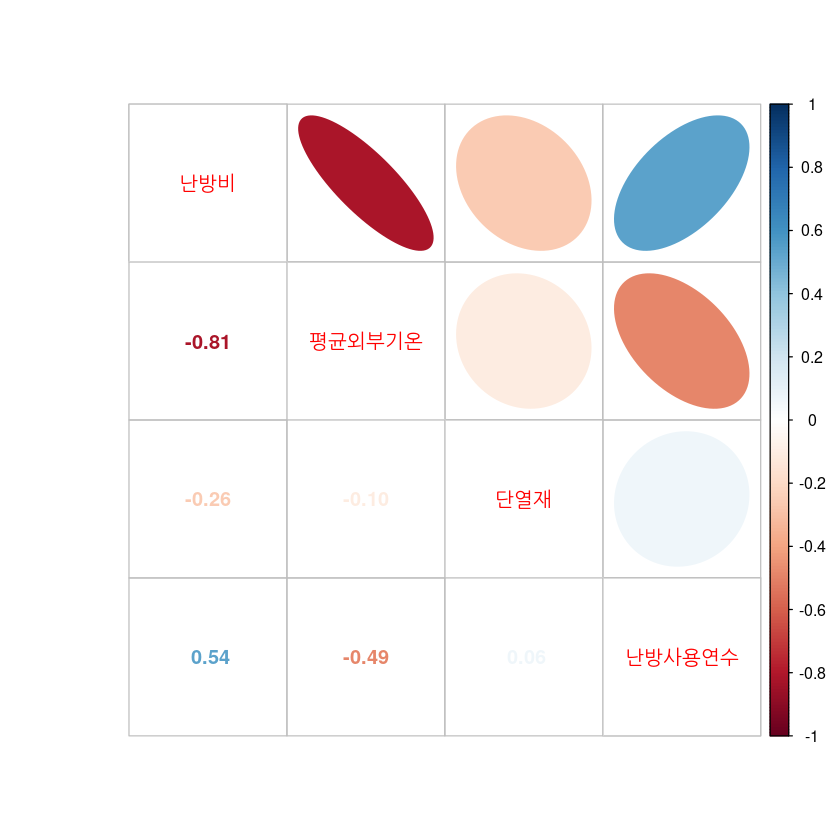

In [6]:
# 상관계수 값을 바꿔보자.
corrplot.mixed(cor, upper='ellipse', 
                    lower='number') # 숫자를 밑에 넣어보자

# 난방비와 관련있는 변수 : 평균외부기온, 난방사용연수

# 다중회귀모델 생성하기
# lm(종속변수~독립변수+독립변수+독립변수, data=객체)
# lm(종속변수~.,data=객체)

# 원래 코드 m1 <- lm(houses$난방비 ~ houses$평균외부기온 + houses단열재 + houses$난방사용연수) 
# 코드 단순화 하기 = m2 <- lm(난방비 + 평균외부기온+단열재+난방사용연수, data=houses)
# m3 <- lm(난방비~., data=houses)
# m2
# y = -4.583+ 단열재 + 난방사용연수
# y = -4.58x1 + -14.83x2 + 6.1x3 + 427.19
# 다중회귀식은 이렇게 해서 만들 수 있다.

# 1) 평균외부기온이 1도 증가 -> 난방비는 -4.5 씩 줄어듬 
# 2) 단열재를 1cm씩 증가 -> 난방비는 -14.8 씩 줄어듬.
# 3) 난방사용연수가 1개월씩 증가 -> 효율이 떨어짐. 난방비는 따라서 6.1만큼 증가한다.
# 4) 각각의 독립변수임이 변화함에 따라서 종속 변수에 영향을 준다는 것이다. 
# 5) 단순회귀는 눈에 딱딱 들어오지만, 하나씩만 보는게 아니고 동시에 봐야 한다. 단순하게 접근할 경우 크게 문제없지만 경우의 수를 돌린다면 
# 어려워질 수도 있음.

In [7]:
m1 <- lm(houses$`난방비` ~ houses$`난방사용연수`+ houses$`단열재` + houses$`평균외부기온`)
m2 <- lm(`난방비` ~ `난방사용연수` + `단열재` + `평균외부기온`, data = houses)
# m3 <- lm(난방비~., data=houses)
# m2
# y = -4.583+ 단열재 + 난방사용연수
# y = -4.58x1 + -14.83x2 + 6.1x3 + 427.19
# 다중회귀식은 이렇게 해서 만들 수 있다.

In [8]:
# 만일, 기온 30도, 단열재 두께가 5mm, 난방기연수가 10년된 주택의 예상 난방비는?
# 문제 풀기

-4.58*30 + -14.83*5 + 6.1*10 + 427.19

[1] 276.64

# 값은 276달러 정도로 환산되었다.

In [9]:
# 회귀모델의 회귀계수 : coef, 간단하게 계수명을 알고싶다. 그럼
coef(m2)

(Intercept) 난방사용연수       단열재 평균외부기온 
  427.193803     6.101032   -14.830863    -4.582663

In [10]:
# 회귀모델 예측하기
# predict(모델변수, 예측유형, 입력값)
inputs <- data.frame(평균외부기온=c(30), 단열재=c(5), 난방기사용연수=c(10)) 
predict(m2, interval='prediction', newdata=inputs # 예측값만 출력
predict(m2, interval='prediction', newdata=inputs) # 신뢰구간 기반 예측값

ERROR: Error in parse(text = x, srcfile = src): <text>:5:1: 예상하지 못한 기호(symbol)입니다.
4: predict(m2, interval='prediction', newdata=inputs # 예측값만 출력
5: predict
   ^


#(ex) 어떤 은행에서 담보주택관련 분석을 위해
# 주택가격, 세대주 교육수준, 세대주 연령, 월 상환액, 세대주 성별들이 가계소득 수준과 어떤 관련이 있는지
# 회귀분석을 실시하시오 (banks.txt)

In [11]:
banks <- read.csv('banks.txt', sep='\t')
head(banks) # 외우자. 불러오기

,Income,Value,Education,Age,Mortgage,Gender
,<dbl>,<int>,<int>,<int>,<int>,<int>
1,100.7,190,14,53,230,1
2,99.0,121,15,49,370,1
3,102.0,161,14,44,397,1
4,100.7,161,14,39,181,1
5,100.0,179,14,53,378,0
6,95.2,99,14,46,304,0


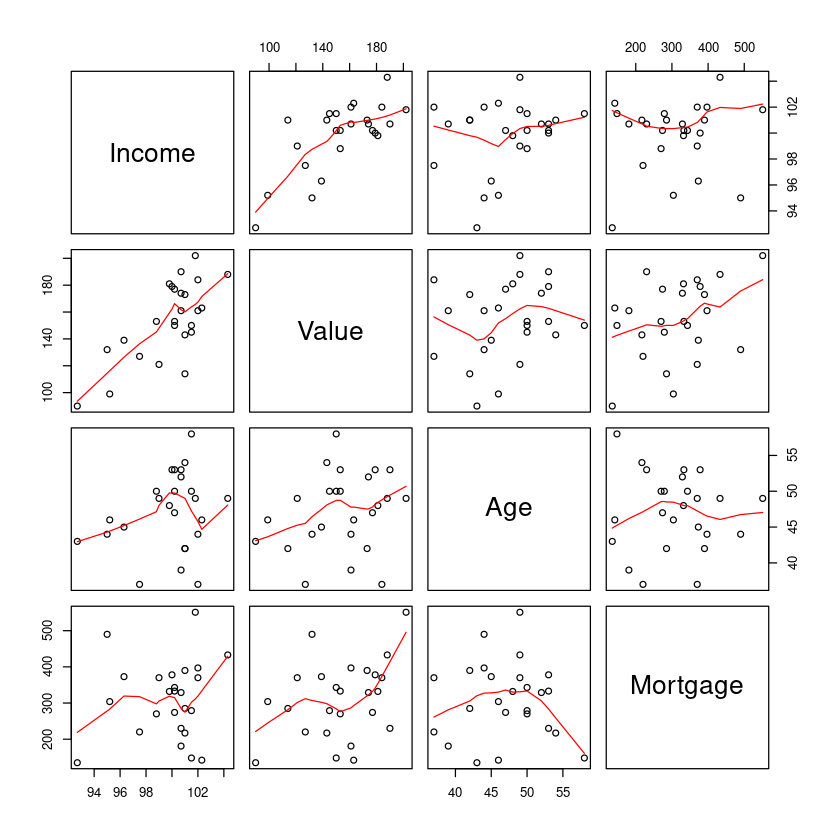

In [12]:
bank <- banks[, c(1,2,4,5)] 
pairs(bank, panel=panel.smooth)

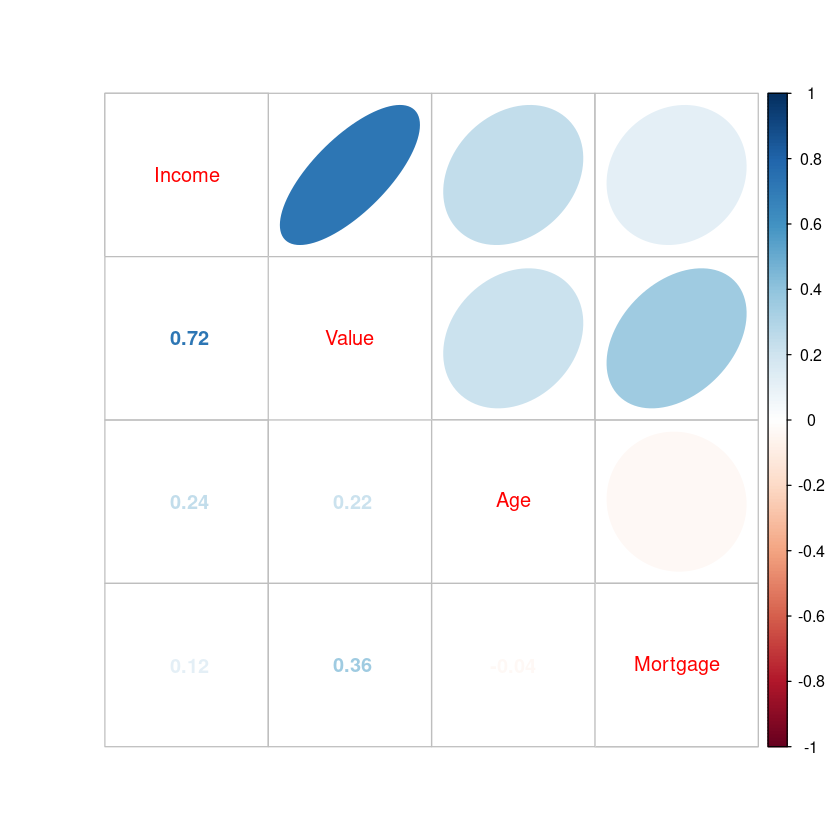

In [13]:
cor <-cor(bank)
corrplot.mixed(cor, upper='ellipse',lower='number')

In [14]:
model <- lm(Income~Value+Age+Mortgage, bank)
coef(model)

(Intercept)        Value          Age     Mortgage 
88.687414203  0.069438669  0.033873198 -0.003733621

In [15]:
coef(model)

(Intercept)        Value          Age     Mortgage 
88.687414203  0.069438669  0.033873198 -0.003733621

In [16]:
summary(model)


Call:
lm(formula = Income ~ Value + Age + Mortgage, data = bank)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1894 -1.3471  0.1877  1.2661  4.0380 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 88.687414   3.770847  23.519  < 2e-16 ***
Value        0.069439   0.014873   4.669 0.000131 ***
Age          0.033873   0.074430   0.455 0.653706    
Mortgage    -0.003734   0.003969  -0.941 0.357542    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9 on 21 degrees of freedom
Multiple R-squared:  0.5461,	Adjusted R-squared:  0.4812 
F-statistic: 8.422 on 3 and 21 DF,  p-value: 0.0007242


In [17]:
# 결정계수 : 0.5461
# 유의성 검정 : pvalue=0.0007242
# 유의성 검정: Pr(>|t|) =0.0007242

In [18]:
y -.0.07x1 + 88.69

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: 예상하지 못한 수치형 상수(numeric constant)입니다.
1: y -.0.07
         ^


In [19]:
# 다중회귀모형 작성시 적절한 필요조건을 만족했는지 확인해 봄
# 난방비 가이드라인 작성을 위해 다중회귀분석을 실시했음
m <- lm(난방비~., houses)

In [20]:
# 2x2 그래프를 그리기 위한 초기화
.opar <- par(no.readonly=T)
par(mfrow= c(2,2))

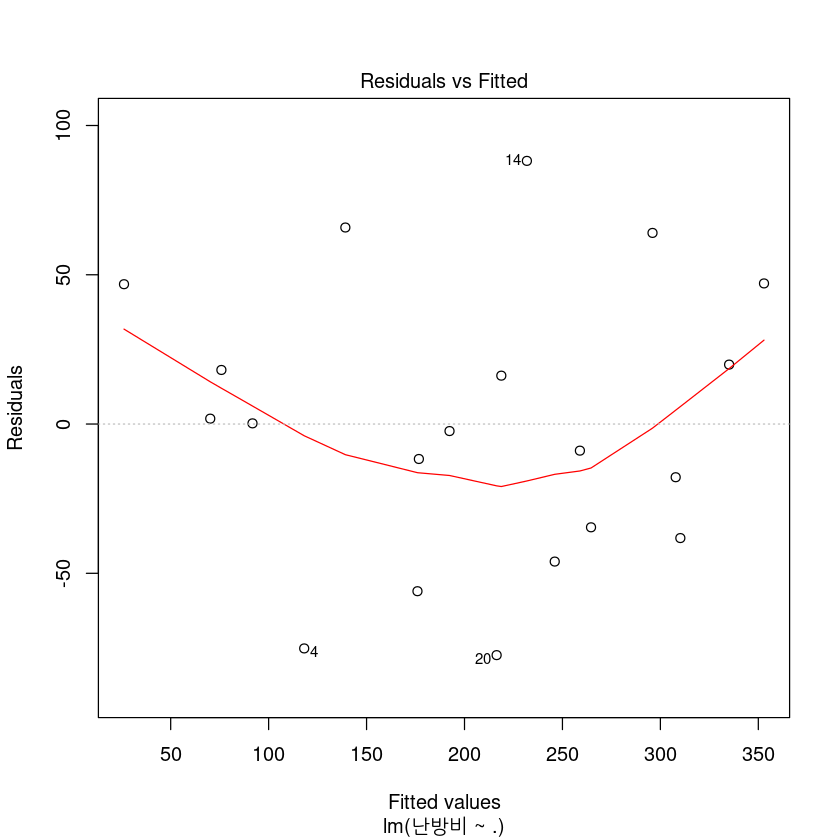

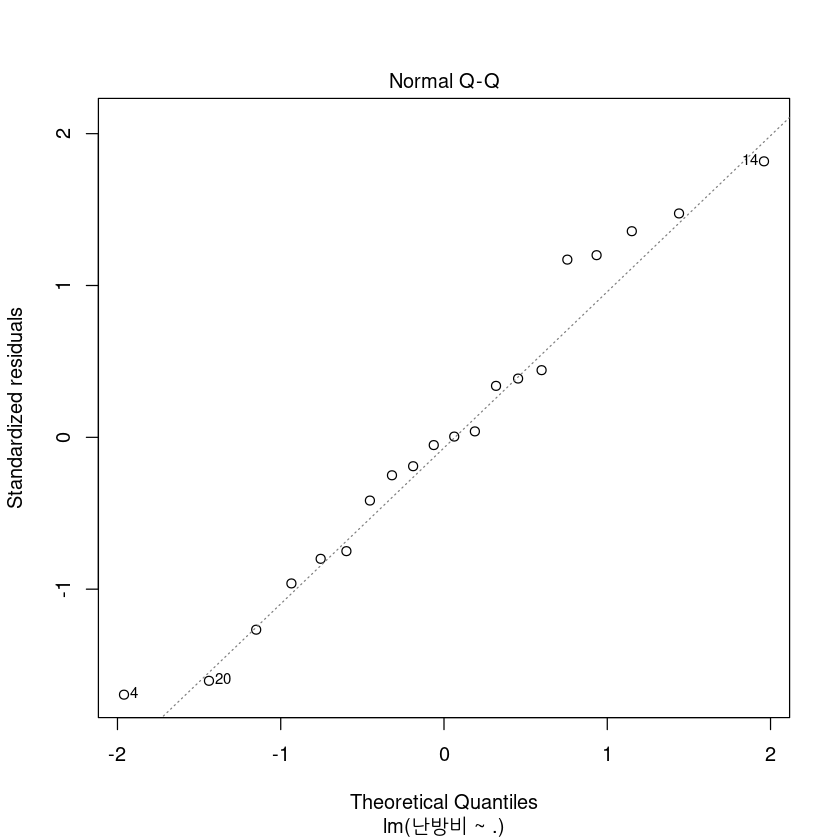

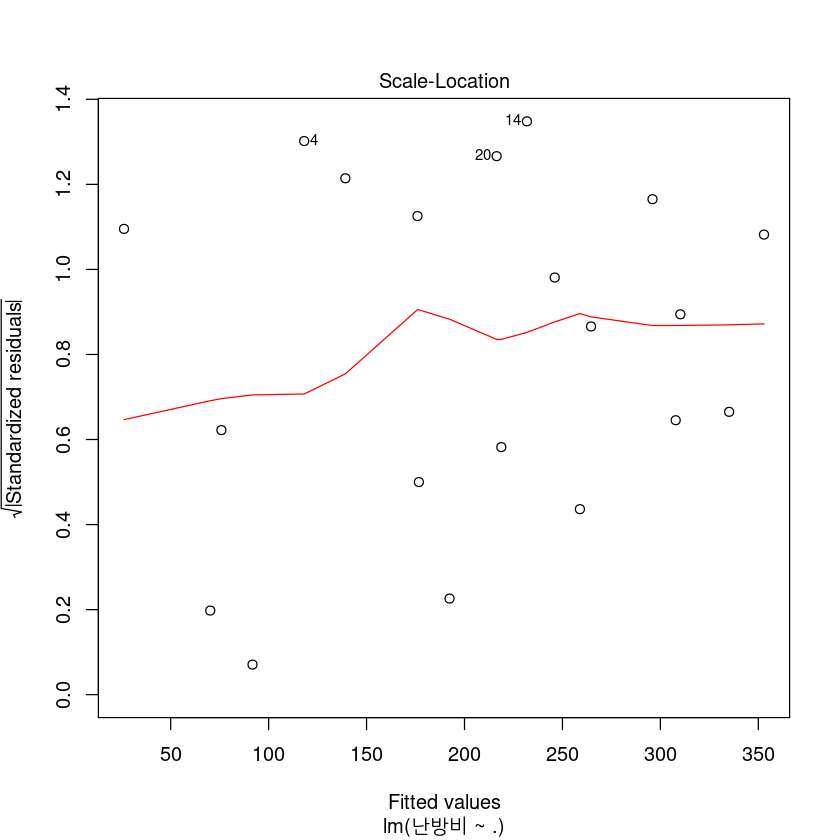

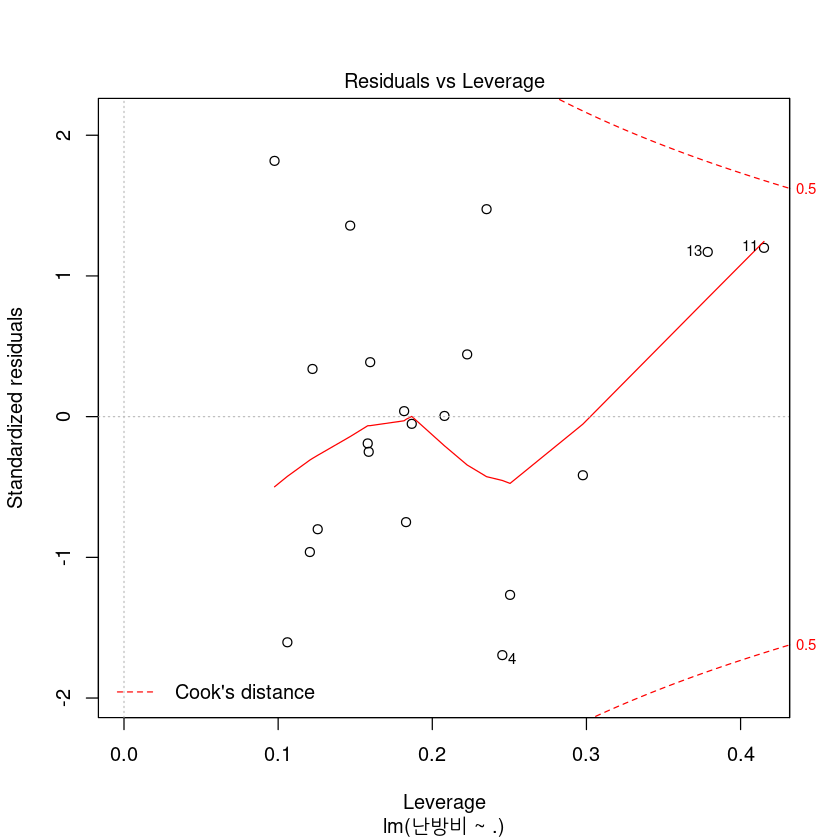

In [21]:
plot(m) # 회귀모형을 분석한 4개의 그래프가 나타남!

# 회귀모형 적합성 그래프
# 시간방향으로 선형성/정규성/분산성/독립성을 의미
# 1) 선형성 : 잔차 예측비교도
# 잔차를 표준화시켜서 정규분포를 따르는지 확인 잔차->오차조차도 그럴듯한 게 만들어진다.

# 1) 선형성 : 잔차 예측비교도
잔차를 표준화시켜서 정규분포를 따르는지

# 3) 분산성 : 잔차 분산 비교도
독립변수의 분산이 일정하면 잔차의 분산도 일정한가
# 4) 독립성 : 잔차의 영향력
# 회귀방정식의 계수결정에 불균형한 영향을 및는 독립변수 (이상치) 존재 파악

In [22]:
par(.opar)

# ==> 수정된 결정계수 : 0.4182로 모델의 결정력은 많이 낮음
# => 회귀계수는 Value만 포함하고 나머지는 제외
# => 회귀모형 적합성은 몇몇의 이상치때문에 선형성,분산성,독립성에 문제가 있는 것으로 보임

# 미술수지가는 그림의 낙찰가격과
# 입찰자수, 보존연수와의 관계를 알아보자고 함
# 독립변수와 종속변수간에 어떤 관련이 있는지
# 회귀분석과 적합성여부를 실시하세요
# artsbuyer.txt
httlp:/naver.me/5SWN66tH

In [23]:
artsbuyer <- read.csv('artsbuyer.txt', sep='\t')
head(artsbuyer) # 외우자. 불러오기

,Painting,Price,Bidders,Age
,<int>,<int>,<int>,<int>
1,1,3470,10,67
2,2,3500,8,56
3,3,3700,7,73
4,4,3860,4,71
5,5,3920,12,99
6,6,3900,10,87


In [36]:
# p-value: 1.034e-05
y = 54.19 * bid + 16.28 * age + 308

ERROR: Error in eval(expr, envir, enclos): 객체 'bid'를 찾을 수 없습니다


In [33]:
library(car)
vif(m)

평균외부기온       단열재 난방사용연수 
    1.318224     1.010972     1.309534

In [31]:
p-value: 1.034e-05
pr(>|t|)
y = 54.19bid + 16.28age + 308

ERROR: Error in parse(text = x, srcfile = src): <text>:2:4: 예기치 않은 '>'입니다
1: p-value: 1.034e-05
2: pr(>
      ^


In [26]:
m2 <- lm(y ~ x1+x3)
coef(m20)

sumary(m2)

ERROR: Error in eval(predvars, data, env): 객체 'y'를 찾을 수 없습니다


In [28]:
summary(m2)


Call:
lm(formula = 난방비 ~ 난방사용연수 + 단열재 + 평균외부기온, 
    data = houses)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.403 -35.492  -1.062  26.642  88.146 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  427.1938    59.6014   7.168 2.24e-06 ***
난방사용연수   6.1010     4.0121   1.521  0.14786    
단열재       -14.8309     4.7544  -3.119  0.00661 ** 
평균외부기온  -4.5827     0.7723  -5.934 2.10e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.05 on 16 degrees of freedom
Multiple R-squared:  0.8042,	Adjusted R-squared:  0.7675 
F-statistic:  21.9 on 3 and 16 DF,  p-value: 6.562e-06


In [29]:
m6 <- lm(y ~ x1+x2+x3)  # x1, x2, x3
summary(m6)

ERROR: Error in eval(predvars, data, env): 객체 'y'를 찾을 수 없습니다


In [32]:
# 결론: x1,x2,x3 

# 회귀모형의 


In [ ]:
# ex) 자동차 부품도매상 관리자는
# 각 지역의 연매출액을 추정하려 함
# 지역내 아웃렛수, 차량등록수, 개인 총소득,
# 자동차 사용녀수, 매니저수 등이 총매루체
# 어떤 영향을 주는지 회귀분석을 실시하시오 (carparts.txt)
http://naver.me/G99l6IVu
https://url.kr/va41mx (수업한거)
